C:\Users\shiva\AppData\Local\Temp\ipykernel_9644\651489279.py:8: RuntimeWarning: divide by zero encountered in divide
  return (green_band - nir_band) / (green_band + nir_band)
C:\Users\shiva\AppData\Local\Temp\ipykernel_9644\651489279.py:8: RuntimeWarning: invalid value encountered in divide
  return (green_band - nir_band) / (green_band + nir_band)


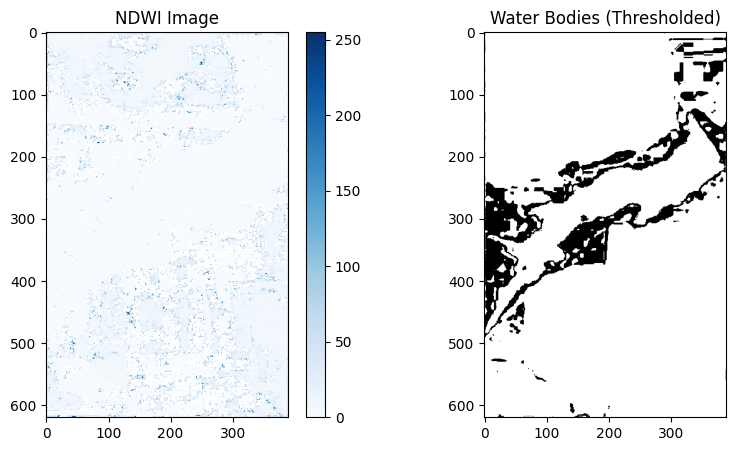

In [24]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cv2  # For reading JPG images

def calculate_ndwi(green_band, nir_band):
    """Calculate NDWI using green and NIR bands."""
    return (green_band - nir_band) / (green_band + nir_band)

def process_image(image_path):
    """Process a single image to calculate NDWI and generate water mask."""
    # Read the image (assuming it's a JPG)
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract the Green (B03) and NIR (B08) bands. 
    # For this example, we will simulate the bands since RGB doesn't have NIR.
    green_band = image[:, :, 1]  # Green channel (G)
    nir_band = image[:, :, 0]     # Simulated NIR using Red channel (R)

    # Calculate NDWI
    ndwi = calculate_ndwi(green_band, nir_band)

    # Apply threshold to classify water
    water_mask = ndwi > 0.3  # Adjust threshold as necessary

    return ndwi, water_mask

def visualize_results(ndwi, water_mask):
    """Visualize the NDWI and water mask."""
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title('NDWI Image')
    plt.imshow(ndwi, cmap='Blues')
    plt.colorbar()
    
    plt.subplot(1, 2, 2)
    plt.title('Water Bodies (Thresholded)')
    plt.imshow(water_mask, cmap='gray')
    plt.show()

# Path to your input image
image_path = 'test/water_body_1018.jpg'  # Replace with your JPG image path

# Process the image and visualize the results
ndwi, water_mask = process_image(image_path)
visualize_results(ndwi, water_mask)


C:\Users\shiva\AppData\Local\Temp\ipykernel_9644\3727975522.py:8: RuntimeWarning: invalid value encountered in divide
  return (green_band - nir_band) / (green_band + nir_band)


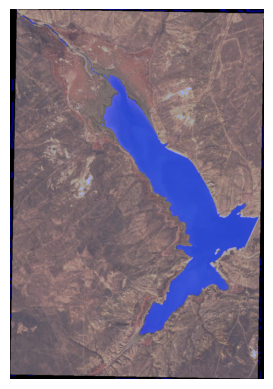

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os  # For handling file paths and directories

def calculate_ndwi(green_band, nir_band):
    """Calculate NDWI using green and NIR bands."""
    return (green_band - nir_band) / (green_band + nir_band)

def process_image(image_path):
    """Process a single image to calculate NDWI and generate water mask."""
    # Read the image (assuming it's a JPG)
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract the Green and NIR bands from the image
    green_band = image[:, :, 1]  # Green channel (G)
    nir_band = image[:, :, 0]     # Simulated NIR using Red channel (R)

    # Ensure the bands are in float format for calculations
    green_band = green_band.astype(float)
    nir_band = nir_band.astype(float)

    # Calculate NDWI
    ndwi = calculate_ndwi(green_band, nir_band)

    # Apply threshold to classify water
    water_mask = ndwi > 0.0  # NDWI values > 0 typically indicate water

    return image, water_mask  # Return original image and water mask

def visualize_and_save_results(image, water_mask, output_path):
    """Visualize the original image with water bodies highlighted and save the result."""
    # Create a colored mask for water
    color_mask = np.zeros_like(image, dtype=np.uint8)  # Initialize a color mask
    color_mask[water_mask] = [0, 0, 255]  # Set water areas to blue (RGB)

    # Overlay the water mask on the original image
    highlighted_image = cv2.addWeighted(image, 1, color_mask, 0.5, 0)  # Blend original and mask

    # Save the highlighted image to the output folder
    os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Create directory if it doesn't exist
    cv2.imwrite(output_path, cv2.cvtColor(highlighted_image, cv2.COLOR_RGB2BGR))  # Save in BGR format

    # Display the image
    plt.imshow(highlighted_image)
    plt.axis('off')  # Turn off axis
    plt.show()

# Path to your input image
image_path = 'test/water_body_690.jpg'  # Replace with your JPG image path

# Path to save the output image
output_path = 'output_images/water_highlighted_image_690.jpg'

# Process the image and visualize the results
image, water_mask = process_image(image_path)
visualize_and_save_results(image, water_mask, output_path)


<>:70: SyntaxWarning: invalid escape sequence '\w'
<>:70: SyntaxWarning: invalid escape sequence '\w'
C:\Users\shiva\AppData\Local\Temp\ipykernel_9644\105402646.py:70: SyntaxWarning: invalid escape sequence '\w'
  image_path = 'output_images\water_highlighted_image_690.jpg'
C:\Users\shiva\AppData\Local\Temp\ipykernel_9644\105402646.py:8: RuntimeWarning: invalid value encountered in divide
  return (green_band - nir_band) / (green_band + nir_band)


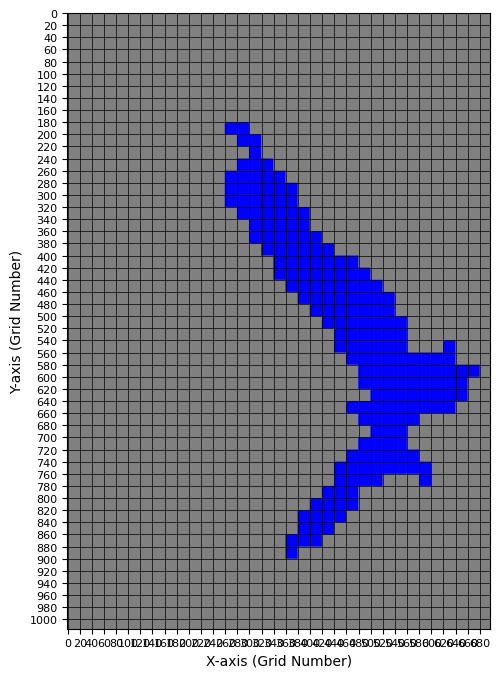

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def calculate_ndwi(green_band, nir_band):
    """Calculate NDWI using green and NIR bands."""
    return (green_band - nir_band) / (green_band + nir_band)

def preprocess_image(image):
    """Apply Gaussian blur to smooth edges and enhance water regions."""
    return cv2.GaussianBlur(image, (5, 5), 0)

def process_image(image_path):
    """Process a single image to calculate NDWI and generate water mask."""
    # Load and convert the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Simulate green and NIR bands
    green_band = image[:, :, 1].astype(float)
    nir_band = image[:, :, 0].astype(float)

    # Calculate NDWI
    ndwi = calculate_ndwi(green_band, nir_band)

    # Generate water mask
    water_mask = ndwi > 0.0

    return image, water_mask

def create_grid_map(image, water_mask, output_path, grid_size=20):
    """Divide image into grids, color-code based on NDWI, and add grid lines and labels."""
    height, width = water_mask.shape
    grid_image = np.zeros_like(image)

    # Dictionary to hold the status of each grid cell
    grid_status_dict = {}

    # Iterate over the image with grid size
    for y in range(0, height, grid_size):
        for x in range(0, width, grid_size):
            # Extract grid cell from water mask
            cell_mask = water_mask[y:y+grid_size, x:x+grid_size]
            
            # Classify grid cell
            if np.mean(cell_mask) > 0.5:  # >0.5 threshold for majority water
                grid_image[y:y+grid_size, x:x+grid_size] = [0, 0, 255]  # Blue for water
                grid_status_dict[(x // grid_size, y // grid_size)] = 'Water'
            else:
                grid_image[y:y+grid_size, x:x+grid_size] = [128, 128, 128]  # Gray for non-water
                grid_status_dict[(x // grid_size, y // grid_size)] = 'Non-water'

    # Save and display
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    cv2.imwrite(output_path, cv2.cvtColor(grid_image, cv2.COLOR_RGB2BGR))

    plt.figure(figsize=(8, 8))
    plt.imshow(grid_image)
    plt.grid(visible=True, color="black", linestyle="-", linewidth=0.5)
    plt.xticks(np.arange(0, width, grid_size), fontsize=8)
    plt.yticks(np.arange(0, height, grid_size), fontsize=8)
    plt.xlabel('X-axis (Grid Number)')
    plt.ylabel('Y-axis (Grid Number)')
    plt.show()

    return grid_image, grid_status_dict

# Path to your input image and output path
image_path = 'output_images\water_highlighted_image_690.jpg'
output_path = 'output_images/grid_image_690.jpg'

# Process the image and calculate NDWI
image, water_mask = process_image(image_path)

# Generate the grid map
grid_image, grid_status = create_grid_map(image, water_mask, output_path)


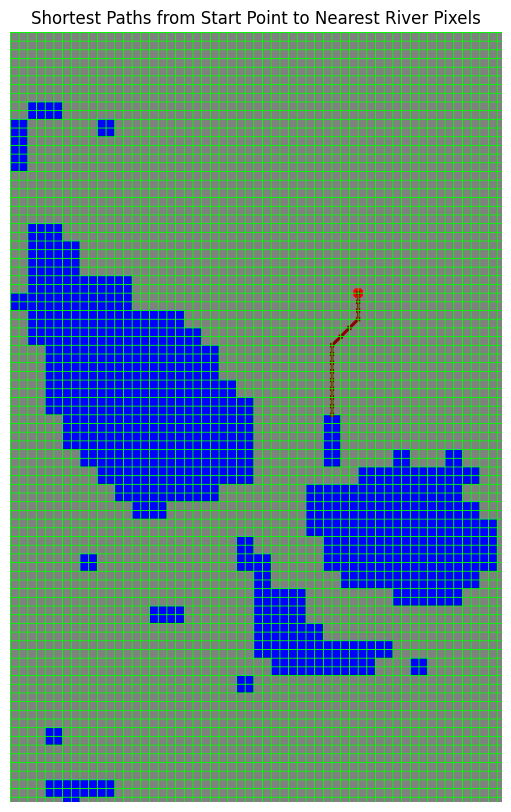

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

def mark_point_and_show_grid_with_dijkstra_path(image_path, start_point=(400,300), grid_size=10, scale=200):
    """Display image with grid markings, mark the start point, and visualize the shortest paths to all river pixels using Dijkstra's algorithm."""
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    
    # Convert image to HSV to detect blue regions (river)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Create mask for blue regions (river pixels)

    # Mark the start point
    sx, sy = start_point
    cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point in red

    # Dijkstra's Setup
    height, width = mask.shape
    visited = set()
    distances = {start_point: 0}
    priority_queue = []
    heappush(priority_queue, (0, sx, sy, []))  # (distance, x, y, path)

    # Directions: up, down, left, right, and diagonals
    directions = [
        (-1, 0), (1, 0), (0, -1), (0, 1),  # Up, down, left, right
        (-1, -1), (-1, 1), (1, -1), (1, 1)  # Diagonals
    ]

    # Store paths to all river pixels
    river_paths = []
    
    # Dijkstra's search
    while priority_queue:
        current_distance, cx, cy, path = heappop(priority_queue)
        
        if (cx, cy) in visited:
            continue
        visited.add((cx, cy))

        # If we reached a blue pixel (river), save the path
        if mask[cy, cx] == 255:  # Found a blue pixel (river)
            river_paths.append(path + [(cx, cy)])  # Store the path to the river
            continue  # Continue searching for other rivers

        # Explore neighbors
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited:
                new_distance = current_distance + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)  # Cost for diagonal movement
                
                if (nx, ny) not in distances or new_distance < distances[(nx, ny)]:
                    distances[(nx, ny)] = new_distance
                    heappush(priority_queue, (new_distance, nx, ny, path + [(cx, cy)]))

    # Draw the shortest path to the first found river
    if river_paths:
        shortest_path = river_paths[0]  # Get the first river path
        for (px, py) in shortest_path:
            cv2.circle(image_rgb, (px, py), 3, (139, 0, 0), -1)  # Dark red circles for path
            if shortest_path.index((px, py)) > 0:
                prev_px, prev_py = shortest_path[shortest_path.index((px, py)) - 1]
                cv2.line(image_rgb, (prev_px, prev_py), (px, py), (139, 0, 0), 2)  # Dark red line

    # Draw grid lines
    for i in range(0, width, grid_size):
        cv2.line(image_rgb, (i, 0), (i, height), (0, 255, 0), 1)  # Vertical grid lines in green
    for j in range(0, height, grid_size):
        cv2.line(image_rgb, (0, j), (width, j), (0, 255, 0), 1)  # Horizontal grid lines in green

    # Display the result
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    
    # Set axis labels with scaled units
    x_ticks = np.arange(0, width, grid_size * 10)
    y_ticks = np.arange(0, height, grid_size * 10)
    plt.xticks(x_ticks, labels=(x_ticks // grid_size * scale))
    plt.yticks(y_ticks, labels=(y_ticks // grid_size * scale))

    plt.xlabel("X-axis (in units)")
    plt.ylabel("Y-axis (in units)")
    plt.title("Shortest Paths from Start Point to Nearest River Pixels")
    plt.axis('off')
    plt.show()

# Example usage
image_path = 'output_images/grid_image_681.jpg'  # Path to your image
mark_point_and_show_grid_with_dijkstra_path(image_path, start_point=(400,300))


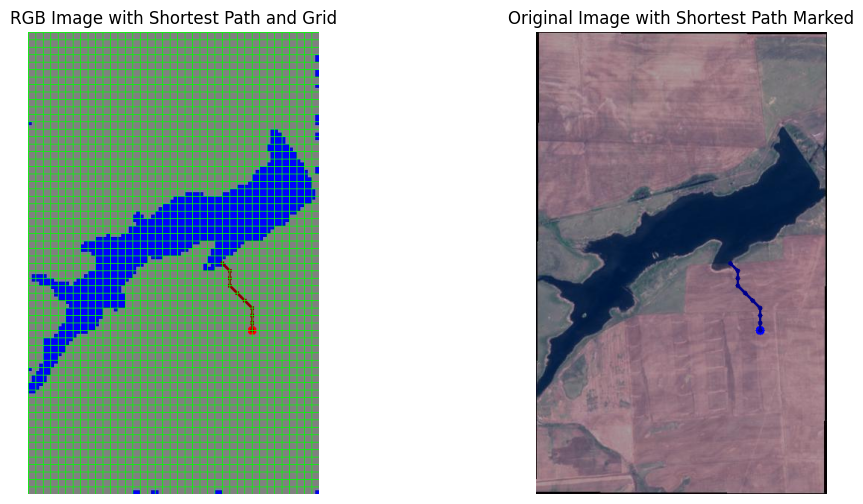

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

def mark_point_and_show_grid_with_dijkstra_path(image_path, original_image_path, start_point=(20,100), grid_size=10, scale=200):
    """Display images with grid markings, mark the start point, and visualize the shortest paths to all river pixels using Dijkstra's algorithm."""
    # Load the image and the original image for marking
    image = cv2.imread(image_path)
    original_image = cv2.imread(original_image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    
    # Convert image to HSV to detect blue regions (river)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Create mask for blue regions (river pixels)

    # Mark the start point on both images
    sx, sy = start_point
    cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point in red
    cv2.circle(original_image, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point on the original image

    # Dijkstra's Setup
    height, width = mask.shape
    visited = set()
    distances = {start_point: 0}
    priority_queue = []
    heappush(priority_queue, (0, sx, sy, []))  # (distance, x, y, path)

    # Directions: up, down, left, right, and diagonals
    directions = [
        (-1, 0), (1, 0), (0, -1), (0, 1),  # Up, down, left, right
        (-1, -1), (-1, 1), (1, -1), (1, 1)  # Diagonals
    ]

    # Store paths to all river pixels
    river_paths = []
    
    # Dijkstra's search
    while priority_queue:
        current_distance, cx, cy, path = heappop(priority_queue)
        
        if (cx, cy) in visited:
            continue
        visited.add((cx, cy))

        # If we reached a blue pixel (river), save the path
        if mask[cy, cx] == 255:  # Found a blue pixel (river)
            river_paths.append(path + [(cx, cy)])  # Store the path to the river
            continue  # Continue searching for other rivers

        # Explore neighbors
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited:
                new_distance = current_distance + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)  # Cost for diagonal movement
                
                if (nx, ny) not in distances or new_distance < distances[(nx, ny)]:
                    distances[(nx, ny)] = new_distance
                    heappush(priority_queue, (new_distance, nx, ny, path + [(cx, cy)]))

    # Draw the shortest path to the first found river
    if river_paths:
        shortest_path = river_paths[0]  # Get the first river path
        for (px, py) in shortest_path:
            # Mark path on both images
            cv2.circle(image_rgb, (px, py), 3, (139, 0, 0), -1)  # Dark red circles for path
            cv2.circle(original_image, (px, py), 3, (139, 0, 0), -1)  # Path on original image
            
            if shortest_path.index((px, py)) > 0:
                prev_px, prev_py = shortest_path[shortest_path.index((px, py)) - 1]
                # Draw lines connecting path points on both images
                cv2.line(image_rgb, (prev_px, prev_py), (px, py), (139, 0, 0), 2)  # Dark red line on RGB
                cv2.line(original_image, (prev_px, prev_py), (px, py), (139, 0, 0), 2)  # Line on original image

    # Draw grid lines on RGB image only
    for i in range(0, width, grid_size):
        cv2.line(image_rgb, (i, 0), (i, height), (0, 255, 0), 1)  # Vertical grid lines in green
    for j in range(0, height, grid_size):
        cv2.line(image_rgb, (0, j), (width, j), (0, 255, 0), 1)  # Horizontal grid lines in green

    # Display the results
    plt.figure(figsize=(12, 6))

    # Display RGB image with grid
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("RGB Image with Shortest Path and Grid")
    plt.axis('off')

    # Display the original image with path markings
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image with Shortest Path Marked")
    plt.axis('off')

    plt.show()

# Example usage
image_path = 'output_images/grid_image_1018.jpg'  # Path to the grid image
original_image_path = 'test/water_body_1018.jpg'  # Path to the original water body image
mark_point_and_show_grid_with_dijkstra_path(image_path, original_image_path, start_point=(300,400))


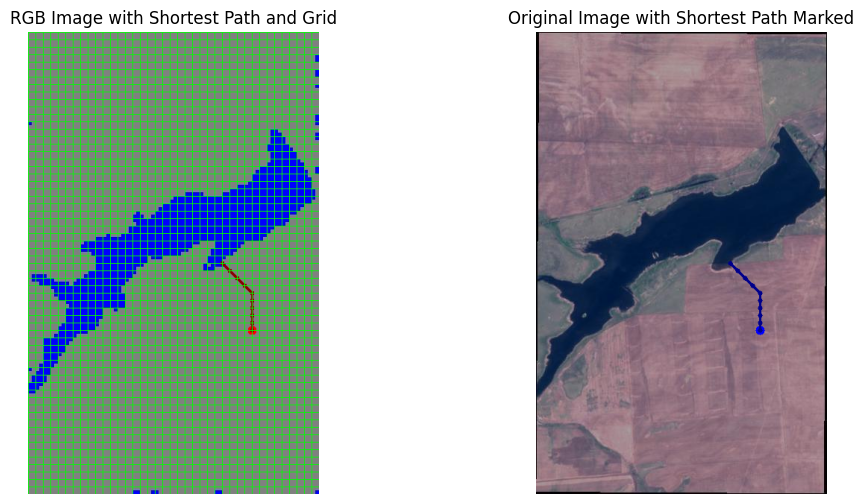

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

def mark_point_and_show_grid_with_bidirectional_path(image_path, original_image_path, start_point=(20, 100), grid_size=10, scale=200):
    """Display images with grid markings, mark the start point, and visualize the shortest path to any river pixel using Bidirectional Search."""
    # Load the images
    image = cv2.imread(image_path)
    original_image = cv2.imread(original_image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib

    # Convert image to HSV to detect blue regions (river)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Create mask for blue regions (river pixels)

    # Mark the start point on both images
    sx, sy = start_point
    cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point in red
    cv2.circle(original_image, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point on the original image

    # Directions for movement: up, down, left, right, and diagonals
    directions = [
        (-1, 0), (1, 0), (0, -1), (0, 1),  # Up, down, left, right
        (-1, -1), (-1, 1), (1, -1), (1, 1)  # Diagonals
    ]

    # Initialize bidirectional search
    height, width = mask.shape
    start_visited = {start_point}
    river_pixels = [(x, y) for y in range(height) for x in range(width) if mask[y, x] == 255]
    end_visited = set(river_pixels)  # All river pixels as possible destinations

    start_queue = [(0, sx, sy, [])]
    end_queue = [(0, x, y, []) for x, y in river_pixels]
    start_distances = {start_point: 0}
    end_distances = {point: 0 for point in river_pixels}

    shortest_path = []

    # Bidirectional search for shortest path
    while start_queue and end_queue:
        # Expand from start side
        start_distance, cx, cy, path = heappop(start_queue)
        
        if (cx, cy) in end_visited:  # Path meets at a river pixel
            shortest_path = path + [(cx, cy)]
            break
        
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in start_visited:
                new_distance = start_distance + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)
                if (nx, ny) not in start_distances or new_distance < start_distances[(nx, ny)]:
                    start_distances[(nx, ny)] = new_distance
                    heappush(start_queue, (new_distance, nx, ny, path + [(cx, cy)]))
                    start_visited.add((nx, ny))

        # Expand from river side
        end_distance, ex, ey, end_path = heappop(end_queue)
        
        if (ex, ey) in start_visited:  # Path meets at a start pixel
            shortest_path = [(sx, sy)] + end_path[::-1]
            break

        for dx, dy in directions:
            nx, ny = ex + dx * grid_size, ey + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in end_visited:
                new_distance = end_distance + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)
                if (nx, ny) not in end_distances or new_distance < end_distances[(nx, ny)]:
                    end_distances[(nx, ny)] = new_distance
                    heappush(end_queue, (new_distance, nx, ny, end_path + [(ex, ey)]))
                    end_visited.add((nx, ny))

    # Draw the shortest path if found
    for (px, py) in shortest_path:
        cv2.circle(image_rgb, (px, py), 3, (139, 0, 0), -1)  # Mark path with dark red circles
        cv2.circle(original_image, (px, py), 3, (139, 0, 0), -1)
        
        # Draw lines connecting the path points on both images
        if shortest_path.index((px, py)) > 0:
            prev_px, prev_py = shortest_path[shortest_path.index((px, py)) - 1]
            cv2.line(image_rgb, (prev_px, prev_py), (px, py), (139, 0, 0), 2)
            cv2.line(original_image, (prev_px, prev_py), (px, py), (139, 0, 0), 2)

    # Draw grid lines on RGB image
    for i in range(0, width, grid_size):
        cv2.line(image_rgb, (i, 0), (i, height), (0, 255, 0), 1)  # Vertical green grid lines
    for j in range(0, height, grid_size):
        cv2.line(image_rgb, (0, j), (width, j), (0, 255, 0), 1)  # Horizontal green grid lines

    # Display the results
    plt.figure(figsize=(12, 6))

    # Display RGB image with grid
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("RGB Image with Shortest Path and Grid")
    plt.axis('off')

    # Display the original image with path markings
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image with Shortest Path Marked")
    plt.axis('off')

    plt.show()

# Example usage
image_path = 'output_images/grid_image_1018.jpg'  # Path to the grid image
original_image_path = 'test/water_body_1018.jpg'  # Path to the original water body image
mark_point_and_show_grid_with_bidirectional_path(image_path, original_image_path, start_point=(300, 400))


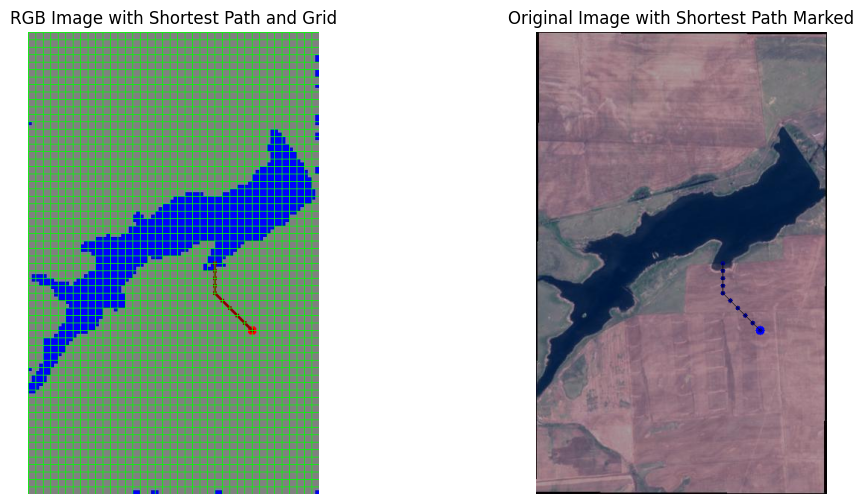

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

def mark_point_and_show_grid_with_astar_path(image_path, original_image_path, start_point=(20,100), grid_size=10, scale=200):
    """Display images with grid markings, mark the start point, and visualize the shortest path to the nearest river pixel using A* algorithm."""
    # Load the image and the original image for marking
    image = cv2.imread(image_path)
    original_image = cv2.imread(original_image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    
    # Convert image to HSV to detect blue regions (river)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Create mask for blue regions (river pixels)

    # Mark the start point on both images
    sx, sy = start_point
    cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point in red
    cv2.circle(original_image, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point on the original image

    # A* Setup
    height, width = mask.shape
    visited = set()
    distances = {start_point: 0}
    priority_queue = []
    heappush(priority_queue, (0, 0, sx, sy, []))  # (total_cost, distance, x, y, path)

    # Directions: up, down, left, right, and diagonals
    directions = [
        (-1, 0), (1, 0), (0, -1), (0, 1),  # Up, down, left, right
        (-1, -1), (-1, 1), (1, -1), (1, 1)  # Diagonals
    ]

    def heuristic(x, y):
        """Heuristic function: Euclidean distance to the nearest blue pixel."""
        # Placeholder heuristic: distance to the center for simplicity
        return np.min(np.sqrt((np.where(mask == 255)[1] - x)**2 + (np.where(mask == 255)[0] - y)**2))

    # A* search
    shortest_path = None
    while priority_queue:
        _, current_distance, cx, cy, path = heappop(priority_queue)
        
        if (cx, cy) in visited:
            continue
        visited.add((cx, cy))

        # If we reached a blue pixel (river), save the path
        if mask[cy, cx] == 255:  # Found a blue pixel (river)
            shortest_path = path + [(cx, cy)]  # Store the path to the river
            break  # Stop searching after finding the first river pixel

        # Explore neighbors
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited:
                new_distance = current_distance + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)  # Cost for diagonal movement
                total_cost = new_distance + heuristic(nx, ny)  # A* cost function: g(n) + h(n)
                
                if (nx, ny) not in distances or new_distance < distances[(nx, ny)]:
                    distances[(nx, ny)] = new_distance
                    heappush(priority_queue, (total_cost, new_distance, nx, ny, path + [(cx, cy)]))

    # Draw the shortest path to the first found river
    if shortest_path:
        for (px, py) in shortest_path:
            # Mark path on both images
            cv2.circle(image_rgb, (px, py), 3, (139, 0, 0), -1)  # Dark red circles for path
            cv2.circle(original_image, (px, py), 3, (139, 0, 0), -1)  # Path on original image
            
            if shortest_path.index((px, py)) > 0:
                prev_px, prev_py = shortest_path[shortest_path.index((px, py)) - 1]
                # Draw lines connecting path points on both images
                cv2.line(image_rgb, (prev_px, prev_py), (px, py), (139, 0, 0), 2)  # Dark red line on RGB
                cv2.line(original_image, (prev_px, prev_py), (px, py), 2)  # Line on original image

    # Draw grid lines on RGB image only
    for i in range(0, width, grid_size):
        cv2.line(image_rgb, (i, 0), (i, height), (0, 255, 0), 1)  # Vertical grid lines in green
    for j in range(0, height, grid_size):
        cv2.line(image_rgb, (0, j), (width, j), (0, 255, 0), 1)  # Horizontal grid lines in green

    # Display the results
    plt.figure(figsize=(12, 6))

    # Display RGB image with grid
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("RGB Image with Shortest Path and Grid")
    plt.axis('off')

    # Display the original image with path markings
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image with Shortest Path Marked")
    plt.axis('off')

    plt.show()

# Example usage
image_path = 'output_images/grid_image_1018.jpg'  # Path to the grid image
original_image_path = 'test/water_body_1018.jpg'  # Path to the original water body image
mark_point_and_show_grid_with_astar_path(image_path, original_image_path, start_point=(300,400))


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

def mark_point_and_show_grid_with_bidirectional_search(image_path, original_image_path, start_point=(20, 100), grid_size=10):
    """Display images with grid markings, mark the start point, and visualize the shortest paths to the nearest river pixel using bidirectional search."""
    # Load the image and original image
    image = cv2.imread(image_path)
    original_image = cv2.imread(original_image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Convert to HSV to detect blue regions (river)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Detect river pixels

    # Mark start point
    sx, sy = start_point
    cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)  # Red start point
    cv2.circle(original_image, (sx, sy), 6, (255, 0, 0), -1)  # Red start point on original image

    height, width = mask.shape
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    # Initialize two queues for bidirectional search
    forward_queue = [(0, sx, sy, [])]  # (distance, x, y, path) from start
    backward_queue = []  # (distance, x, y, path) from nearest river pixel

    # Find initial river pixels and start backward search
    river_pixels = np.argwhere(mask == 255)
    if len(river_pixels) > 0:
        rx, ry = river_pixels[0]
        backward_queue = [(0, rx, ry, [])]
        cv2.circle(image_rgb, (rx, ry), 6, (0, 0, 255), -1)  # Mark river pixel in blue

    # Dijkstra’s bidirectional search
    visited_forward, visited_backward = {}, {}
    shortest_path = None

    while forward_queue and backward_queue:
        # Expand forward search
        f_dist, fx, fy, f_path = heappop(forward_queue)
        if (fx, fy) in visited_backward:
            shortest_path = f_path + visited_backward[(fx, fy)][::-1]
            break
        visited_forward[(fx, fy)] = f_path
        for dx, dy in directions:
            nx, ny = fx + dx * grid_size, fy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited_forward:
                new_distance = f_dist + (np.sqrt(2) if dx != 0 and dy != 0 else 1)
                heappush(forward_queue, (new_distance, nx, ny, f_path + [(fx, fy)]))

        # Expand backward search
        b_dist, bx, by, b_path = heappop(backward_queue)
        if (bx, by) in visited_forward:
            shortest_path = visited_forward[(bx, by)] + b_path[::-1]
            break
        visited_backward[(bx, by)] = b_path
        for dx, dy in directions:
            nx, ny = bx + dx * grid_size, by + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited_backward:
                new_distance = b_dist + (np.sqrt(2) if dx != 0 and dy != 0 else 1)
                heappush(backward_queue, (new_distance, nx, ny, b_path + [(bx, by)]))

    # Draw the shortest path if found
    if shortest_path:
        for (px, py) in shortest_path:
            cv2.circle(image_rgb, (px, py), 3, (139, 0, 0), -1)
            cv2.circle(original_image, (px, py), 3, (139, 0, 0), -1)
            if shortest_path.index((px, py)) > 0:
                prev_px, prev_py = shortest_path[shortest_path.index((px, py)) - 1]
                cv2.line(image_rgb, (prev_px, prev_py), (px, py), (139, 0, 0), 2)
                cv2.line(original_image, (prev_px, prev_py), (px, py), 2)

    # Draw grid lines
    for i in range(0, width, grid_size):
        cv2.line(image_rgb, (i, 0), (i, height), (0, 255, 0), 1)
    for j in range(0, height, grid_size):
        cv2.line(image_rgb, (0, j), (width, j), (0, 255, 0), 1)

    # Display results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("RGB Image with Shortest Path and Grid")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image with Shortest Path Marked")
    plt.axis('off')

    plt.show()

# Example usage
image_path = 'output_images/grid_image_1018.jpg'
original_image_path = 'test/water_body_1018.jpg'
mark_point_and_show_grid_with_bidirectional_search(image_path, original_image_path, start_point=(300, 400))


   Start Point River Point   Distance
0    (93, 602)    (3, 482)  15.727922
1    (69, 560)    (9, 480)  10.485281
2   (363, 385)   (19, 470)  11.071068
3   (200, 175)  (210, 215)   4.414214
4    (35, 263)   (75, 283)   4.828427
5   (124, 602)  (220, 215)   4.828427
6   (318, 572)  (200, 225)   5.000000
7   (114, 216)  (144, 246)   4.242641
8   (261, 601)   (75, 293)   5.242641
9   (302, 503)  (154, 246)   5.242641
10  (315, 204)  (315, 204)   0.000000
11  (279, 603)  (230, 215)   5.242641
12  (228, 568)  (190, 225)   5.414214
13   (29, 334)   (29, 334)   0.000000
14   (47, 182)  (210, 225)   5.414214
15  (249, 497)   (85, 283)   5.828427
16   (73, 414)   (73, 404)   1.000000
17  (240, 168)   (63, 404)   1.414214
18  (167, 413)   (53, 414)   2.000000
19  (253, 441)   (53, 404)   2.414214


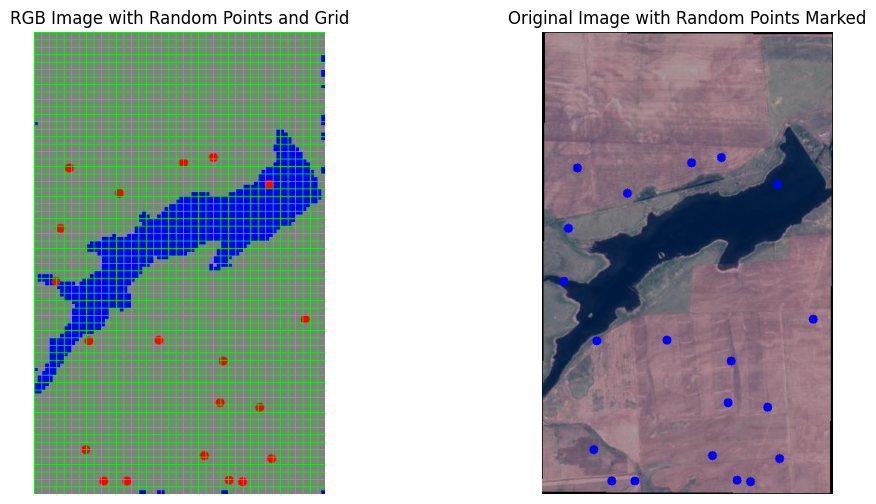

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush
import random
import pandas as pd

def mark_point_and_show_grid_with_dijkstra_path(image_path, original_image_path, num_random_points=20, grid_size=10, scale=200):
    """Display images with grid markings, mark random points, and visualize the shortest paths to all river pixels using Dijkstra's algorithm."""
    # Load the image and the original image for marking
    image = cv2.imread(image_path)
    original_image = cv2.imread(original_image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    
    # Convert image to HSV to detect blue regions (river)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Create mask for blue regions (river pixels)

    # Generate random points for start positions
    height, width = mask.shape
    random_points = [(random.randint(0, width-1), random.randint(0, height-1)) for _ in range(num_random_points)]
    
    # Dijkstra's Setup
    visited = set()
    distances = {}
    priority_queue = []

    # Directions: up, down, left, right, and diagonals
    directions = [
        (-1, 0), (1, 0), (0, -1), (0, 1),  # Up, down, left, right
        (-1, -1), (-1, 1), (1, -1), (1, 1)  # Diagonals
    ]
    
    # Store distances and paths to each river pixel
    river_distances = []

    # Dijkstra's search for each random point
    for sx, sy in random_points:
        # Mark the start point on both images
        cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point in red
        cv2.circle(original_image, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point on the original image

        # Reset Dijkstra setup for each random point
        visited.clear()
        distances = { (sx, sy): 0 }
        heappush(priority_queue, (0, sx, sy, []))  # (distance, x, y, path)
        
        while priority_queue:
            current_distance, cx, cy, path = heappop(priority_queue)
            
            if (cx, cy) in visited:
                continue
            visited.add((cx, cy))

            # If we reached a blue pixel (river), record the distance
            if mask[cy, cx] == 255:  # Found a blue pixel (river)
                river_distances.append({
                    'Start Point': (sx, sy),
                    'River Point': (cx, cy),
                    'Distance': current_distance
                })
                break  # Stop search once the river is found

            # Explore neighbors
            for dx, dy in directions:
                nx, ny = cx + dx * grid_size, cy + dy * grid_size
                if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited:
                    new_distance = current_distance + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)  # Cost for diagonal movement
                    
                    if (nx, ny) not in distances or new_distance < distances[(nx, ny)]:
                        distances[(nx, ny)] = new_distance
                        heappush(priority_queue, (new_distance, nx, ny, path + [(cx, cy)]))
    
    # Create a DataFrame to display the distances in a table
    df = pd.DataFrame(river_distances)
    
    # Display the results
    print(df)
    
    # Draw grid lines on RGB image only
    for i in range(0, width, grid_size):
        cv2.line(image_rgb, (i, 0), (i, height), (0, 255, 0), 1)  # Vertical grid lines in green
    for j in range(0, height, grid_size):
        cv2.line(image_rgb, (0, j), (width, j), (0, 255, 0), 1)  # Horizontal grid lines in green

    # Display the results
    plt.figure(figsize=(12, 6))

    # Display RGB image with grid
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("RGB Image with Random Points and Grid")
    plt.axis('off')

    # Display the original image with path markings
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image with Random Points Marked")
    plt.axis('off')

    plt.show()

# Example usage
image_path = 'output_images/grid_image_1018.jpg'  # Path to the grid image
original_image_path = 'test/water_body_1018.jpg'  # Path to the original water body image
mark_point_and_show_grid_with_dijkstra_path(image_path, original_image_path, num_random_points=20)


   Start Point River Point  Distance (Dijkstra)
0   (166, 256)  (166, 256)             0.000000
1   (365, 179)  (365, 179)             0.000000
2    (116, 26)  (216, 216)            23.142136
3     (7, 449)   (17, 449)             1.000000
4   (288, 171)  (308, 191)             2.828427
5   (349, 426)  (249, 316)            15.142136
6    (86, 570)    (6, 480)            12.313708
7    (10, 245)   (70, 285)             7.656854
8     (19, 81)  (149, 241)            21.384776
9   (141, 225)  (141, 245)             2.000000
10  (129, 545)  (149, 615)             7.828427
11    (66, 43)  (146, 243)            23.313708
12  (302, 127)  (332, 137)             3.414214
13  (164, 500)   (74, 400)            13.727922
14  (233, 324)  (243, 304)             2.414214
15  (164, 235)  (154, 245)             1.414214
16   (42, 143)    (2, 123)             4.828427
17    (95, 53)  (145, 243)            21.071068
18  (246, 380)  (246, 310)             7.000000
19  (135, 511)   (45, 421)            12

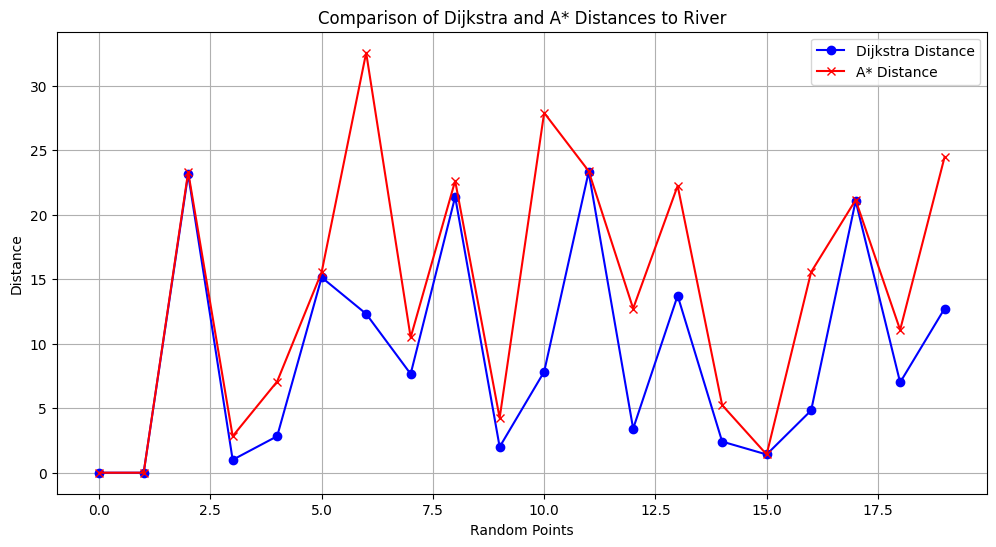

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush
import random
import pandas as pd
from collections import deque

def astar_search(image, mask, start, grid_size, directions):
    """Implement A* search algorithm."""
    height, width = mask.shape
    open_list = []
    closed_list = set()
    g_score = {start: 0}
    f_score = {start: np.linalg.norm(np.array(start) - np.array([width // 2, height // 2]))}  # Heuristic: Euclidean distance to the center
    came_from = {}

    heappush(open_list, (f_score[start], start))

    while open_list:
        _, current = heappop(open_list)
        if current in closed_list:
            continue
        closed_list.add(current)

        # If we reach a river pixel (blue region), return the path distance
        cx, cy = current
        if mask[cy, cx] == 255:
            return g_score[current]

        # Explore neighbors
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in closed_list:
                tentative_g_score = g_score[current] + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)

                if (nx, ny) not in g_score or tentative_g_score < g_score[(nx, ny)]:
                    g_score[(nx, ny)] = tentative_g_score
                    f_score[(nx, ny)] = tentative_g_score + np.linalg.norm(np.array([nx, ny]) - np.array([width // 2, height // 2]))
                    came_from[(nx, ny)] = current
                    heappush(open_list, (f_score[(nx, ny)], (nx, ny)))

    return float('inf')  # If no path is found

def mark_point_and_show_grid_with_dijkstra_and_astar(image_path, original_image_path, num_random_points=20, grid_size=10):
    """Display images with grid markings, mark random points, and visualize the shortest paths using Dijkstra's and A* algorithms."""
    # Load the image and the original image for marking
    image = cv2.imread(image_path)
    original_image = cv2.imread(original_image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    
    # Convert image to HSV to detect blue regions (river)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Create mask for blue regions (river pixels)

    # Generate random points for start positions
    height, width = mask.shape
    random_points = [(random.randint(0, width-1), random.randint(0, height-1)) for _ in range(num_random_points)]
    
    # Dijkstra's Setup
    directions = [
        (-1, 0), (1, 0), (0, -1), (0, 1),  # Up, down, left, right
        (-1, -1), (-1, 1), (1, -1), (1, 1)  # Diagonals
    ]
    
    # Store distances for both Dijkstra's and A*
    river_distances_dijkstra = []
    river_distances_astar = []

    for sx, sy in random_points:
        # Mark the start point on both images
        cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point in red
        cv2.circle(original_image, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point on the original image

        # Dijkstra's algorithm
        visited = set()
        distances = { (sx, sy): 0 }
        priority_queue = [(0, sx, sy)]  # (distance, x, y)

        while priority_queue:
            current_distance, cx, cy = heappop(priority_queue)

            if (cx, cy) in visited:
                continue
            visited.add((cx, cy))

            # If we reached a blue pixel (river), record the distance
            if mask[cy, cx] == 255:
                river_distances_dijkstra.append({
                    'Start Point': (sx, sy),
                    'River Point': (cx, cy),
                    'Distance (Dijkstra)': current_distance
                })
                break  # Stop search once the river is found

            # Explore neighbors
            for dx, dy in directions:
                nx, ny = cx + dx * grid_size, cy + dy * grid_size
                if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited:
                    new_distance = current_distance + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)  # Diagonal cost
                    heappush(priority_queue, (new_distance, nx, ny))

        # A* algorithm
        astar_distance = astar_search(image, mask, (sx, sy), grid_size, directions)
        river_distances_astar.append({
            'Start Point': (sx, sy),
            'Distance (A*)': astar_distance
        })

    # Combine both distances into a DataFrame
    df_dijkstra = pd.DataFrame(river_distances_dijkstra)
    df_astar = pd.DataFrame(river_distances_astar)

    # Display the results
    print(df_dijkstra)
    print(df_astar)

    # Plotting graph of both Dijkstra and A* distances
    plt.figure(figsize=(12, 6))
    plt.plot(df_dijkstra['Distance (Dijkstra)'], label='Dijkstra Distance', color='b', marker='o')
    plt.plot(df_astar['Distance (A*)'], label="A* Distance", color='r', marker='x')
    plt.title("Comparison of Dijkstra and A* Distances to River")
    plt.xlabel("Random Points")
    plt.ylabel("Distance")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
image_path = 'output_images/grid_image_1018.jpg'  # Path to the grid image
original_image_path = 'test/water_body_1018.jpg'  # Path to the original water body image
mark_point_and_show_grid_with_dijkstra_and_astar(image_path, original_image_path, num_random_points=20)


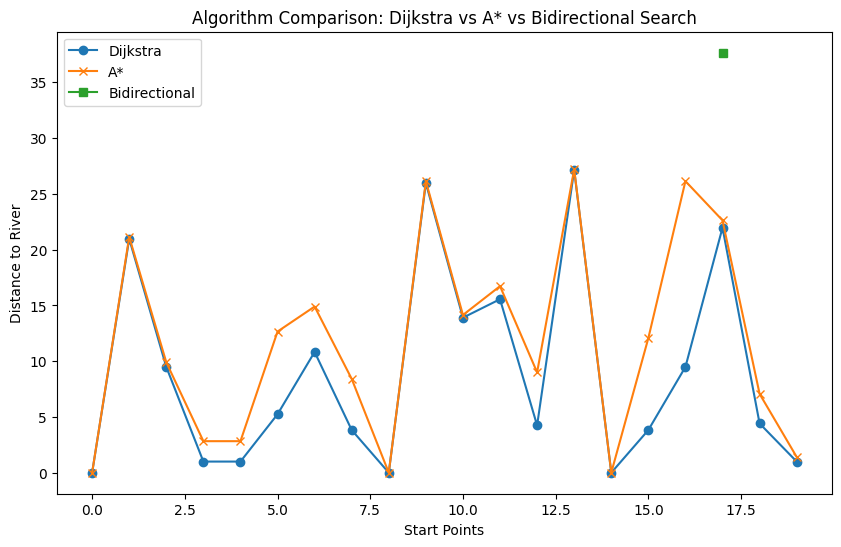

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush
import random
import pandas as pd
from collections import deque

def astar_search(image, mask, start, grid_size, directions):
    """Implement A* search algorithm."""
    height, width = mask.shape
    open_list = []
    closed_list = set()
    g_score = {start: 0}
    f_score = {start: np.linalg.norm(np.array(start) - np.array([width // 2, height // 2]))}  # Heuristic: Euclidean distance to the center
    came_from = {}

    heappush(open_list, (f_score[start], start))

    while open_list:
        _, current = heappop(open_list)
        if current in closed_list:
            continue
        closed_list.add(current)

        # If we reach a river pixel (blue region), return the path distance
        cx, cy = current
        if mask[cy, cx] == 255:
            return g_score[current]

        # Explore neighbors
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in closed_list:
                tentative_g_score = g_score[current] + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)

                if (nx, ny) not in g_score or tentative_g_score < g_score[(nx, ny)]:
                    g_score[(nx, ny)] = tentative_g_score
                    f_score[(nx, ny)] = tentative_g_score + np.linalg.norm(np.array([nx, ny]) - np.array([width // 2, height // 2]))
                    came_from[(nx, ny)] = current
                    heappush(open_list, (f_score[(nx, ny)], (nx, ny)))

    return float('inf')  # If no path is found

def bidirectional_search(image, mask, start, grid_size, directions):
    """Implement Bidirectional Search with meeting point detection."""
    height, width = mask.shape

    # Initialize data structures for the bidirectional search
    front_open = []
    back_open = []
    front_closed = set()
    back_closed = set()
    front_g_score = {start: 0}
    
    # Assuming the goal is any blue pixel (river region)
    river_points = np.argwhere(mask == 255)
    if len(river_points) == 0:
        return float('inf')  # No river points found

    # Choose a river point as the target (for this example, we take the first river point)
    target = tuple(river_points[0][::-1])  # Reverse coordinates to (x, y) format
    back_g_score = {target: 0}

    heappush(front_open, (0, start))
    heappush(back_open, (0, target))

    while front_open and back_open:
        # Front search
        _, current_front = heappop(front_open)
        if current_front in front_closed:
            continue
        front_closed.add(current_front)

        # If the two searches meet, calculate the total distance
        if current_front in back_closed:
            return front_g_score[current_front] + back_g_score[current_front]

        # Explore neighbors for the front search
        cx, cy = current_front
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in front_closed:
                tentative_g_score = front_g_score[current_front] + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)

                if (nx, ny) not in front_g_score or tentative_g_score < front_g_score[(nx, ny)]:
                    front_g_score[(nx, ny)] = tentative_g_score
                    heappush(front_open, (tentative_g_score, (nx, ny)))

        # Back search
        _, current_back = heappop(back_open)
        if current_back in back_closed:
            continue
        back_closed.add(current_back)

        # If the two searches meet, calculate the total distance
        if current_back in front_closed:
            return front_g_score[current_back] + back_g_score[current_back]

        # Explore neighbors for the back search
        cx, cy = current_back
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in back_closed:
                tentative_g_score = back_g_score[current_back] + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)

                if (nx, ny) not in back_g_score or tentative_g_score < back_g_score[(nx, ny)]:
                    back_g_score[(nx, ny)] = tentative_g_score
                    heappush(back_open, (tentative_g_score, (nx, ny)))

    return float('inf')  # If no path is found

def mark_point_and_show_grid_with_all_searches(image_path, original_image_path, num_random_points=20, grid_size=10):
    """Display images with grid markings, mark random points, and visualize the shortest paths using Dijkstra's, A*, and Bidirectional Search algorithms."""
    # Load the image and the original image for marking
    image = cv2.imread(image_path)
    original_image = cv2.imread(original_image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    
    # Convert image to HSV to detect blue regions (river)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Create mask for blue regions (river pixels)

    # Generate random points for start positions
    height, width = mask.shape
    random_points = [(random.randint(0, width-1), random.randint(0, height-1)) for _ in range(num_random_points)]
    
    # Dijkstra's Setup
    directions = [
        (-1, 0), (1, 0), (0, -1), (0, 1),  # Up, down, left, right
        (-1, -1), (-1, 1), (1, -1), (1, 1)  # Diagonals
    ]
    
    # Store distances for Dijkstra's, A*, and Bidirectional Search
    river_distances_dijkstra = []
    river_distances_astar = []
    river_distances_bidirectional = []

    for sx, sy in random_points:
        # Mark the start point on both images
        cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point in red
        cv2.circle(original_image, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point on the original image

        # Dijkstra's algorithm
        visited = set()
        distances = { (sx, sy): 0 }
        priority_queue = [(0, sx, sy)]  # (distance, x, y)

        while priority_queue:
            current_distance, cx, cy = heappop(priority_queue)

            if (cx, cy) in visited:
                continue
            visited.add((cx, cy))

            # If we reached a blue pixel (river), record the distance
            if mask[cy, cx] == 255:
                river_distances_dijkstra.append({
                    'Start Point': (sx, sy),
                    'River Point': (cx, cy),
                    'Distance (Dijkstra)': current_distance
                })
                break  # Stop search once the river is found

            # Explore neighbors
            for dx, dy in directions:
                nx, ny = cx + dx * grid_size, cy + dy * grid_size
                if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited:
                    new_distance = current_distance + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)  # Diagonal cost
                    heappush(priority_queue, (new_distance, nx, ny))

        # A* algorithm
        astar_distance = astar_search(image, mask, (sx, sy), grid_size, directions)
        river_distances_astar.append({
            'Start Point': (sx, sy),
            'Distance (A*)': astar_distance
        })

        # Bidirectional Search
        bidirectional_distance = bidirectional_search(image, mask, (sx, sy), grid_size, directions)
        river_distances_bidirectional.append({
            'Start Point': (sx, sy),
            'Distance (Bidirectional)': bidirectional_distance
        })

    # Dataframe for comparison
    df_dijkstra = pd.DataFrame(river_distances_dijkstra)
    df_astar = pd.DataFrame(river_distances_astar)
    df_bidirectional = pd.DataFrame(river_distances_bidirectional)

    # Plotting comparison
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df_dijkstra['Distance (Dijkstra)'], label='Dijkstra', marker='o')
    ax.plot(df_astar['Distance (A*)'], label='A*', marker='x')
    ax.plot(df_bidirectional['Distance (Bidirectional)'], label='Bidirectional', marker='s')
    ax.set_xlabel('Start Points')
    ax.set_ylabel('Distance to River')
    ax.legend()
    ax.set_title('Algorithm Comparison: Dijkstra vs A* vs Bidirectional Search')
    plt.show()

    return image_rgb, original_image, df_dijkstra, df_astar, df_bidirectional

# Example usage
image_path = 'output_images/grid_image_1018.jpg'  # Path to the grid image
original_image_path = 'test/water_body_1018.jpg'  # Path to the original water body image
image_rgb, original_image, df_dijkstra, df_astar, df_bidirectional = mark_point_and_show_grid_with_all_searches(image_path, original_image_path)


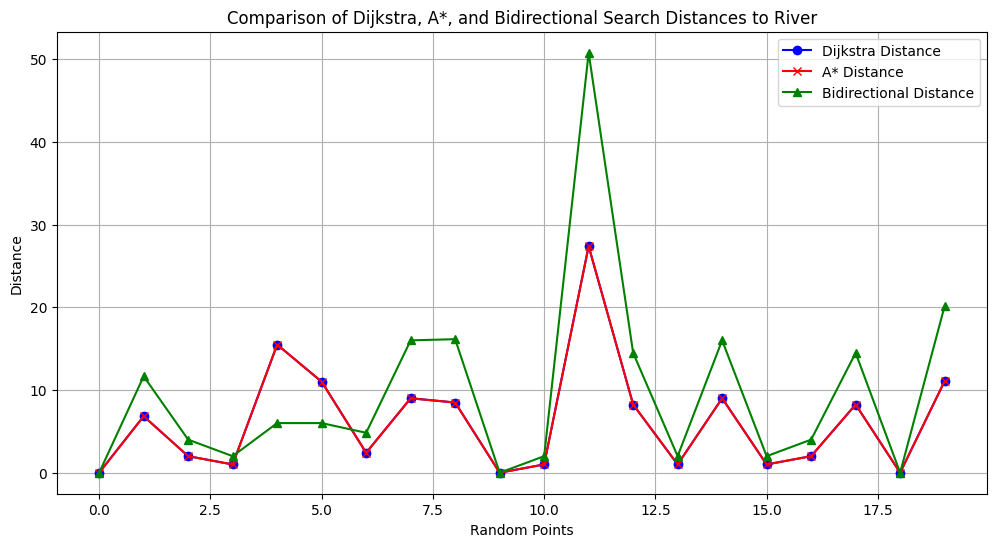

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush
import random
import pandas as pd

def astar_search(image, mask, start, goal, grid_size, directions):
    """Bidirectional A* search to find path from start to goal."""
    open_list = []
    closed_list = set()
    g_score = {start: 0}
    f_score = {start: np.linalg.norm(np.array(start) - np.array(goal))}
    came_from = {}

    heappush(open_list, (f_score[start], start)) 

    while open_list:
        _, current = heappop(open_list)
        if current in closed_list:
            continue
        closed_list.add(current)

        # Goal reached
        if current == goal:
            return g_score[current]

        # Explore neighbors
        cx, cy = current
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < mask.shape[1] and 0 <= ny < mask.shape[0] and (nx, ny) not in closed_list:
                tentative_g_score = g_score[current] + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)
                if (nx, ny) not in g_score or tentative_g_score < g_score[(nx, ny)]:
                    g_score[(nx, ny)] = tentative_g_score
                    f_score[(nx, ny)] = tentative_g_score + np.linalg.norm(np.array([nx, ny]) - np.array(goal))
                    came_from[(nx, ny)] = current
                    heappush(open_list, (f_score[(nx, ny)], (nx, ny)))

    return float('inf')

def bidirectional_search(mask, start, end, grid_size, directions):
    """Run bidirectional search from start to end and return shortest path distance."""
    if start == end:
        return 0
    open_list_start, open_list_end = [], []
    closed_list_start, closed_list_end = set(), set()
    g_score_start, g_score_end = {start: 0}, {end: 0}
    f_score_start = {start: np.linalg.norm(np.array(start) - np.array(end))}
    f_score_end = {end: np.linalg.norm(np.array(end) - np.array(start))}

    heappush(open_list_start, (f_score_start[start], start))
    heappush(open_list_end, (f_score_end[end], end))

    def explore_neighbors(open_list, closed_list, g_score, f_score, other_closed_list, grid_size):
        _, current = heappop(open_list)
        closed_list.add(current)
        cx, cy = current

        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < mask.shape[1] and 0 <= ny < mask.shape[0] and (nx, ny) not in closed_list:
                tentative_g_score = g_score[current] + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)
                if (nx, ny) not in g_score or tentative_g_score < g_score[(nx, ny)]:
                    g_score[(nx, ny)] = tentative_g_score
                    f_score[(nx, ny)] = tentative_g_score + np.linalg.norm(np.array([nx, ny]) - np.array(end))
                    heappush(open_list, (f_score[(nx, ny)], (nx, ny)))

                if (nx, ny) in other_closed_list:
                    return tentative_g_score + g_score[(nx, ny)]
        return None

    while open_list_start and open_list_end:
        result_start = explore_neighbors(open_list_start, closed_list_start, g_score_start, f_score_start, closed_list_end, grid_size)
        if result_start:
            return result_start
        result_end = explore_neighbors(open_list_end, closed_list_end, g_score_end, f_score_end, closed_list_start, grid_size)
        if result_end:
            return result_end

    return float('inf')

def mark_point_and_show_grid_with_dijkstra_and_astar(image_path, original_image_path, num_random_points=20, grid_size=10):
    """Display images with grid markings, mark random points, and visualize shortest paths with Dijkstra, A*, and Bidirectional Search."""
    image = cv2.imread(image_path)
    original_image = cv2.imread(original_image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

    height, width = mask.shape
    random_points = [(random.randint(0, width-1), random.randint(0, height-1)) for _ in range(num_random_points)]
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    river_distances_dijkstra = []
    river_distances_astar = []
    river_distances_bi = []

    for sx, sy in random_points:
        cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)
        cv2.circle(original_image, (sx, sy), 6, (255, 0, 0), -1)

        priority_queue = [(0, sx, sy)]
        visited = set()
        dijkstra_goal = None

        while priority_queue:
            current_distance, cx, cy = heappop(priority_queue)
            if (cx, cy) in visited:
                continue
            visited.add((cx, cy))

            if mask[cy, cx] == 255:
                dijkstra_goal = (cx, cy)
                river_distances_dijkstra.append(current_distance)
                break

            for dx, dy in directions:
                nx, ny = cx + dx * grid_size, cy + dy * grid_size
                if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited:
                    new_distance = current_distance + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)
                    heappush(priority_queue, (new_distance, nx, ny))

        if dijkstra_goal:
            astar_distance = astar_search(image, mask, (sx, sy), dijkstra_goal, grid_size, directions)
            river_distances_astar.append(astar_distance)
            bi_distance = bidirectional_search(mask, (sx, sy), dijkstra_goal, grid_size, directions)
            river_distances_bi.append(bi_distance)

    plt.figure(figsize=(12, 6))
    plt.plot(river_distances_dijkstra, label='Dijkstra Distance', color='b', marker='o')
    plt.plot(river_distances_astar, label='A* Distance', color='r', marker='x')
    plt.plot(river_distances_bi, label='Bidirectional Distance', color='g', marker='^')
    plt.title("Comparison of Dijkstra, A*, and Bidirectional Search Distances to River")
    plt.xlabel("Random Points")
    plt.ylabel("Distance")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
image_path = 'output_images/grid_image_1018.jpg'
original_image_path = 'test/water_body_1018.jpg'
mark_point_and_show_grid_with_dijkstra_and_astar(image_path, original_image_path, num_random_points=20)
